<a href="https://colab.research.google.com/github/sofiaborgato/Bioinformatic_project/blob/main/Classifiers/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/sofiaborgato/Bioinformatic_project.git'

Cloning into 'Bioinformatic_project'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 242 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (242/242), 7.94 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import tarfile
import os
# open file
file = tarfile.open('./Bioinformatic_project/data_local_concat.tar.xz') 
# extracting file
file.extractall('./Bioinformatic_project')
  
file.close()

In [4]:

def nullscan(df_check):
    df_nulls = (df_check == 0) 
    print(df_nulls)
    print('end')
    nulls_per_col = df_nulls.sum(axis=0)
    nulls_per_col /= len(df_check.index)
    print(nulls_per_col)
    print('end')
    with plt.style.context('ggplot'):
        fig = plt.figure(figsize=(80,50))
        ax1 = plt.subplot()
        vir = mp.cm.get_cmap('magma')
        colormap = mp.colors.ListedColormap([vir(0), 'darkgreen'])
        sns.heatmap((df_check == 0), cmap=colormap, cbar=False, yticklabels=False, ax=ax1)
        ax1.set_title('0 ValueS Rate per Column', fontsize=15)
        fig.tight_layout() 
        plt.show()
    return(nulls_per_col)

In [10]:
stat=pd.read_csv('./Bioinformatic_project/data_local_concat/stats.csv')#dataset of the 5 known variantes
#1000 samples for each variant
#india=pd.read_csv('/content/Bioinformatic_project/demo_clust_stats.csv')
indian=pd.read_csv('/content/new_stats.csv')#450 samples of indiand variants

     s_ORF1ab  ns_ORF1ab  mc_ORF1ab  ...  ins_NON_COD  fs_NON_COD  label
0       False       True       True  ...         True        True   True
1       False       True      False  ...         True        True   True
2       False       True       True  ...         True        True   True
3        True       True       True  ...         True        True   True
4       False       True       True  ...         True        True   True
..        ...        ...        ...  ...          ...         ...    ...
447     False       True       True  ...         True        True  False
448     False       True       True  ...         True       False  False
449     False       True       True  ...         True       False  False
450     False       True       True  ...         True       False  False
451     False       True       True  ...         True       False  False

[6443 rows x 85 columns]
end
s_ORF1ab       0.038647
ns_ORF1ab      0.902685
mc_ORF1ab      0.340059
mnc_ORF1ab     0.05028

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


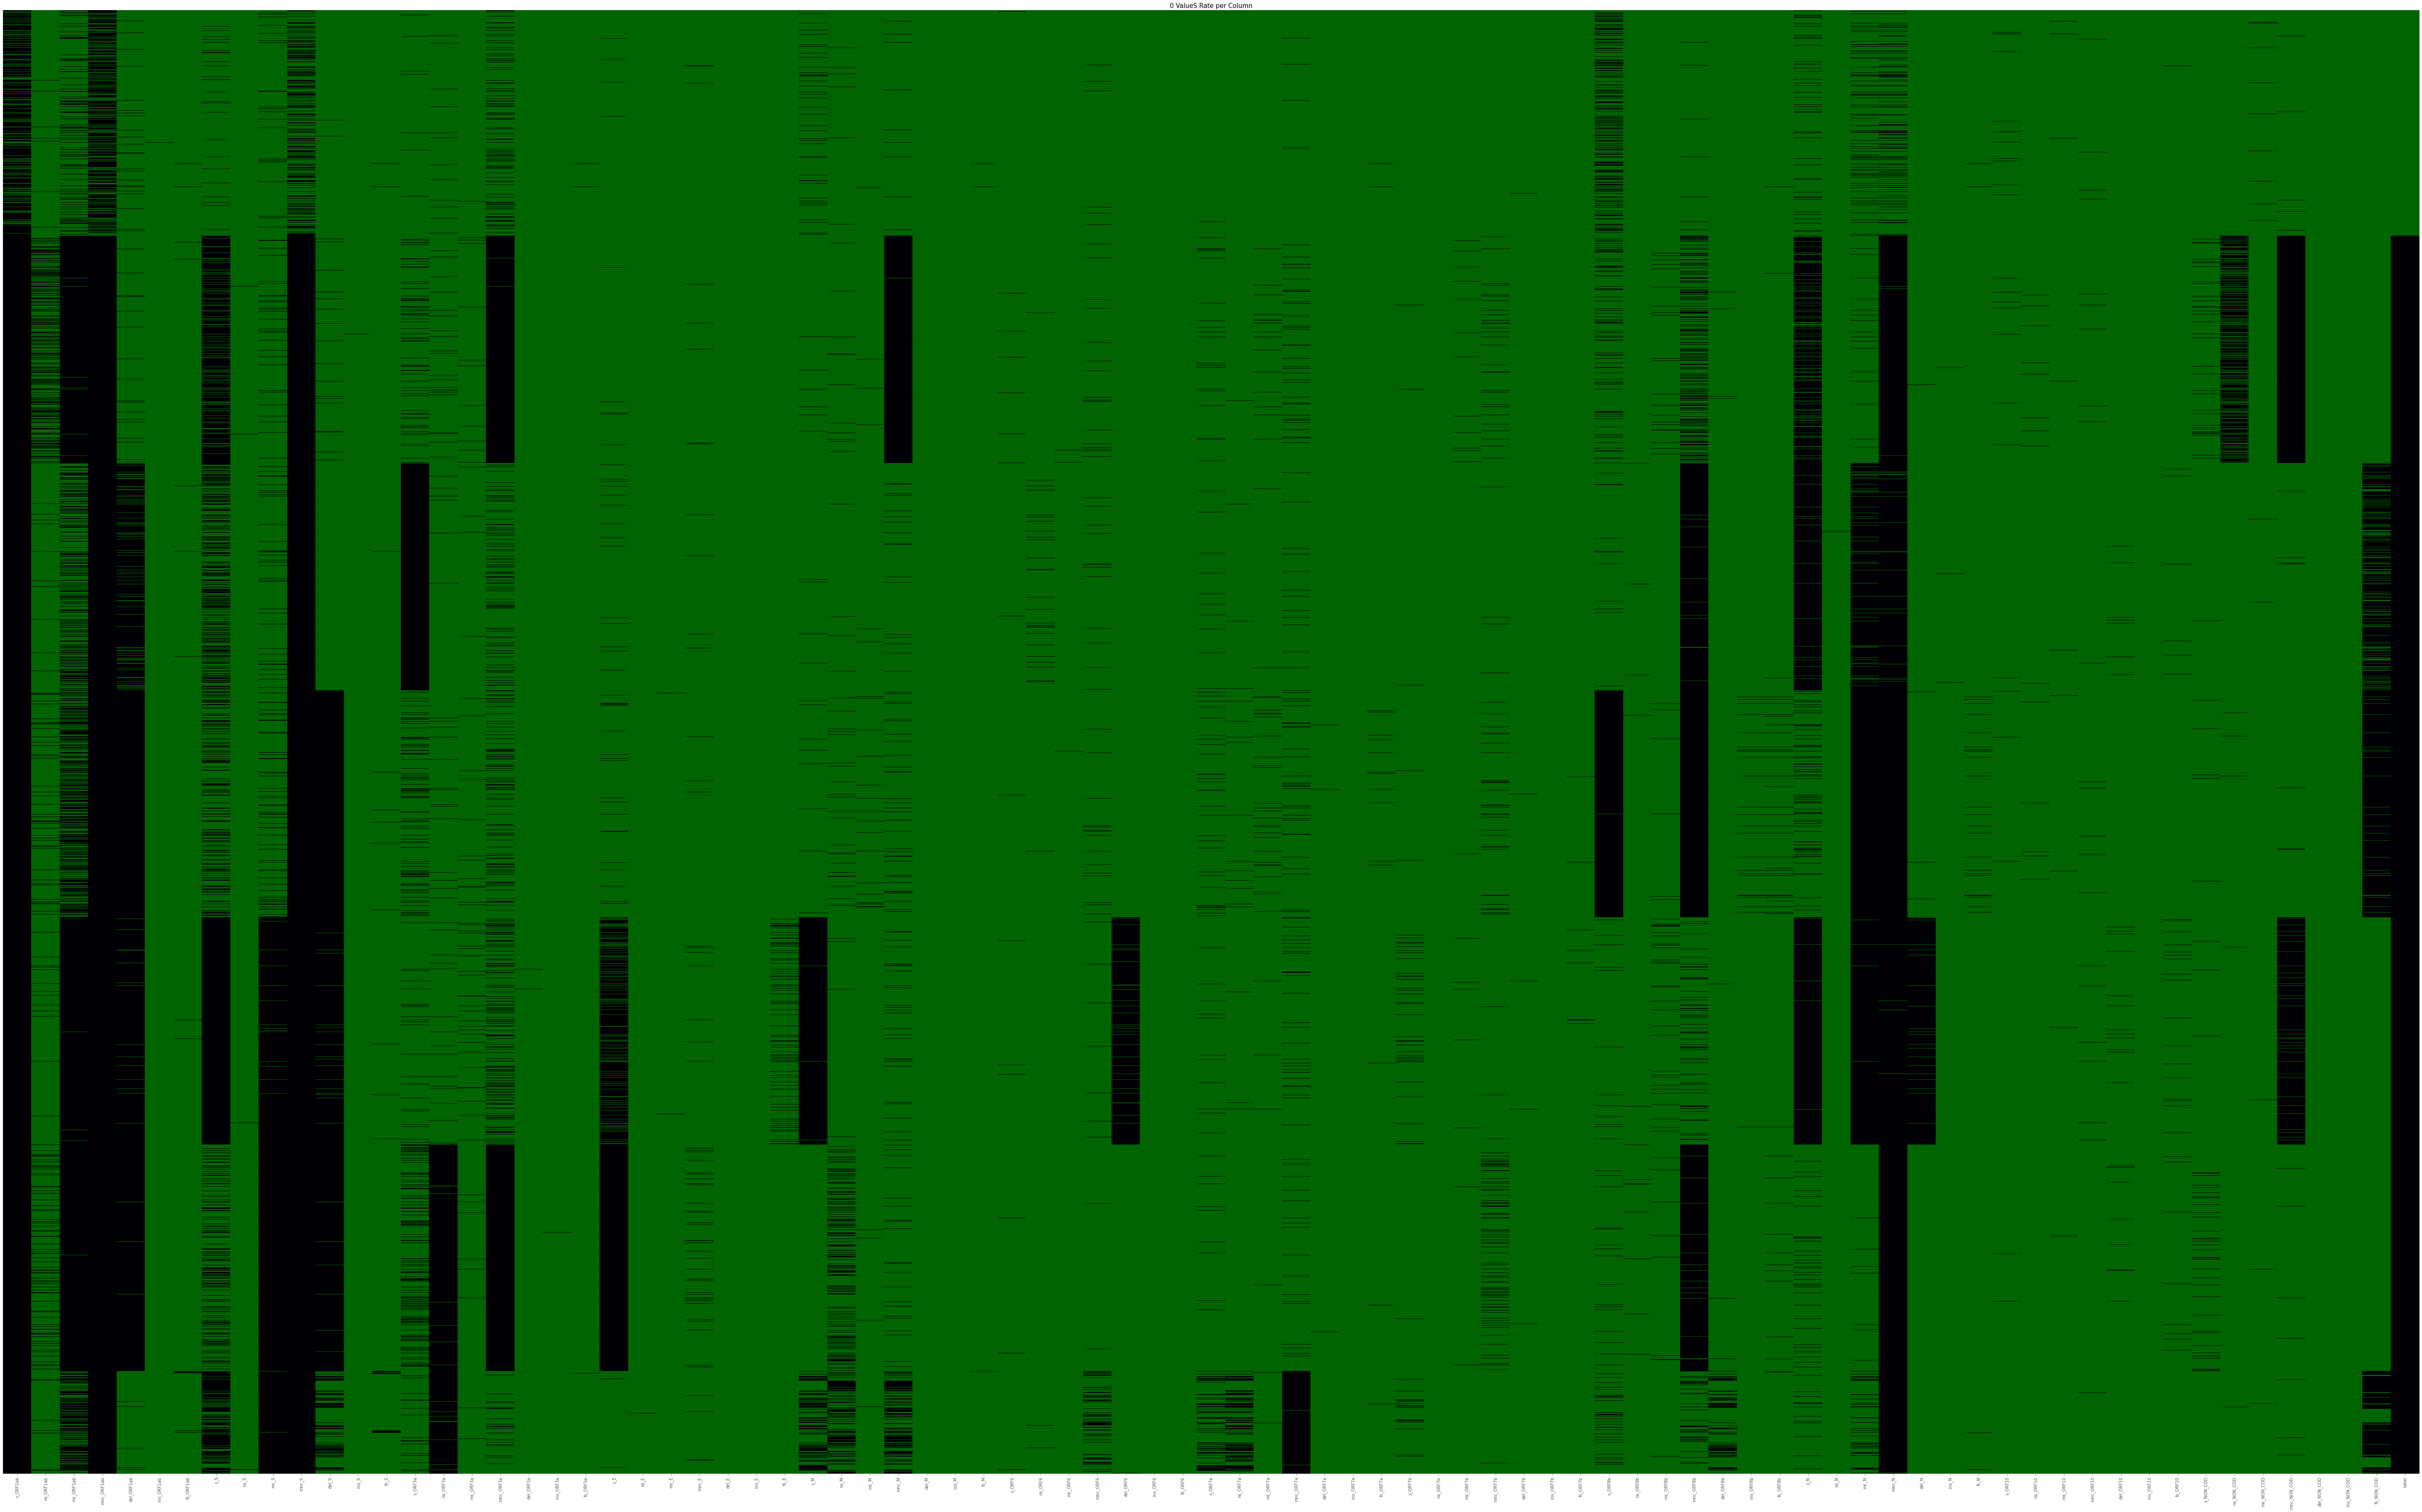

In [13]:
total=pd.concat([stat,indian])
null_per=nullscan(total)#remove the columns with quite all null values
for line,col_name in zip(null_per,total.columns):
  if line>0.99:
    stat.drop(col_name,axis=1,inplace=True)
    indian.drop(col_name,axis=1,inplace=True)

  
#data=total.drop('label',axis=1,inplace=False)
#label=total['label']


DBSCAN: Choose min point values as 2xdim==>2x40=80


In [25]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette('Paired'))
my_cmap.colors

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

samples of indian variants:20


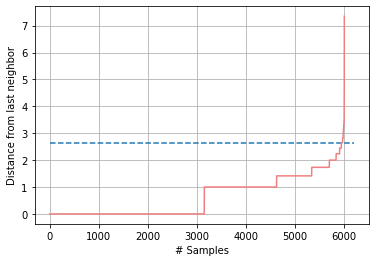

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 7
Estimated number of clusters: 7
Homogeneity: 0.982
Completeness: 0.961
V-measure: 0.971
Adjusted Rand Index: 0.982
Adjusted Mutual Information: 0.971
Silhouette Coefficient: 0.464





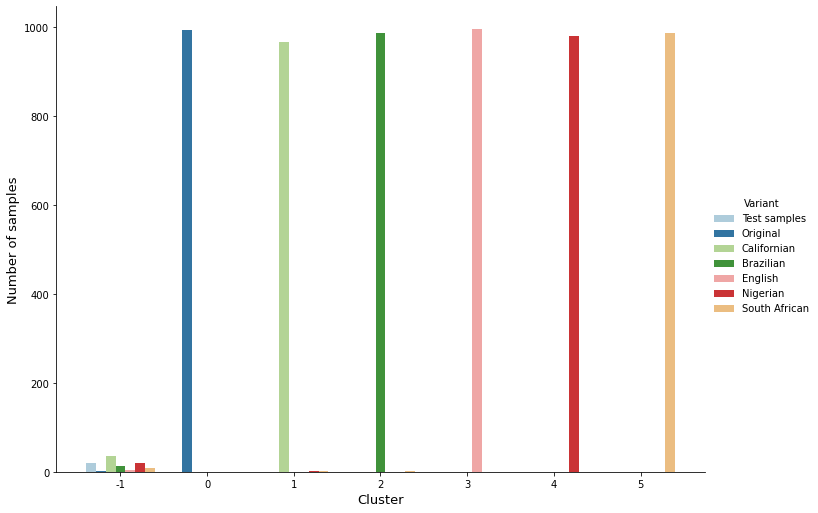

samples of indian variants:40


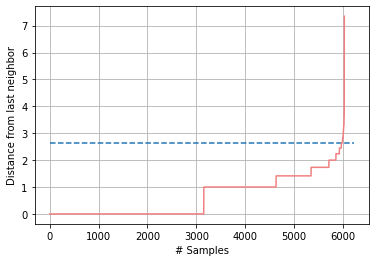

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 7
Estimated number of clusters: 7
Homogeneity: 0.980
Completeness: 0.961
V-measure: 0.970
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.970
Silhouette Coefficient: 0.462





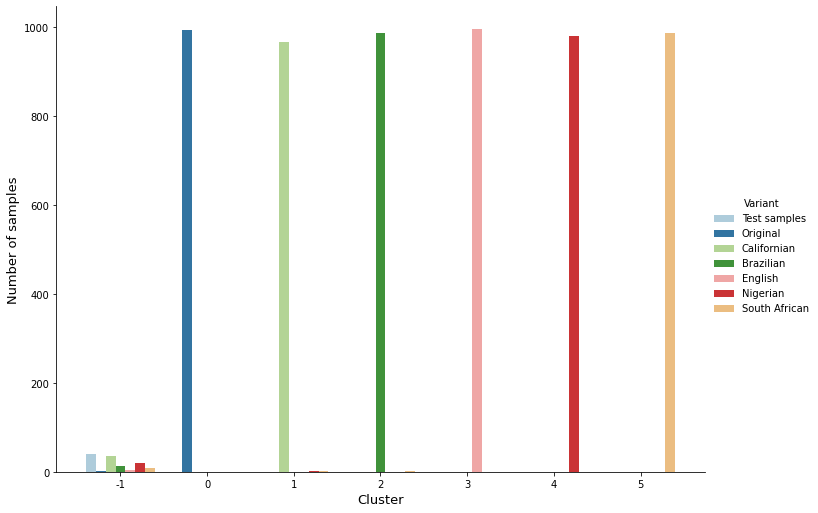

samples of indian variants:45


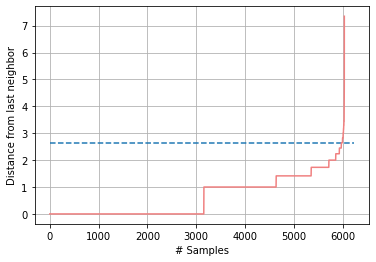

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 7
Estimated number of clusters: 7
Homogeneity: 0.979
Completeness: 0.961
V-measure: 0.970
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.970
Silhouette Coefficient: 0.462





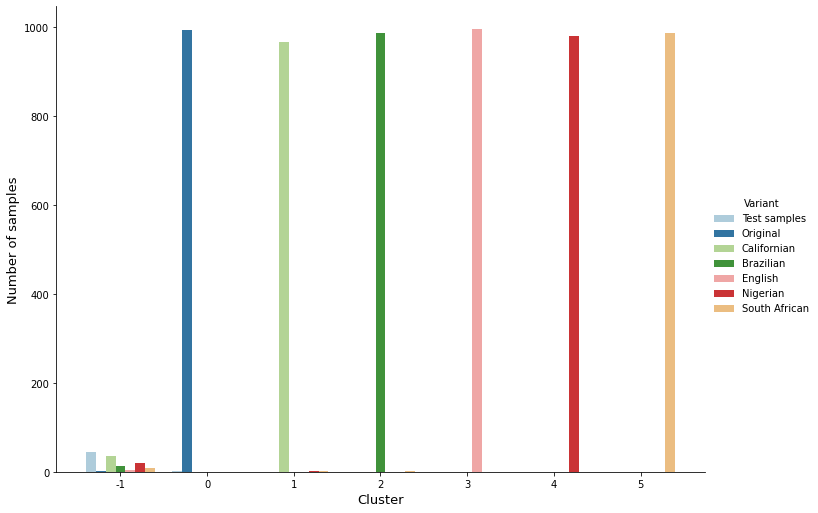

samples of indian variants:50


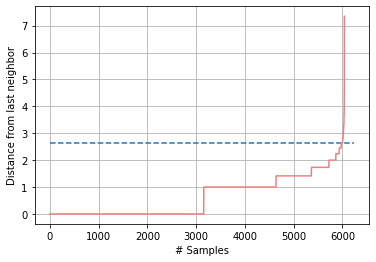

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 7
Estimated number of clusters: 7
Homogeneity: 0.979
Completeness: 0.961
V-measure: 0.970
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.970
Silhouette Coefficient: 0.461





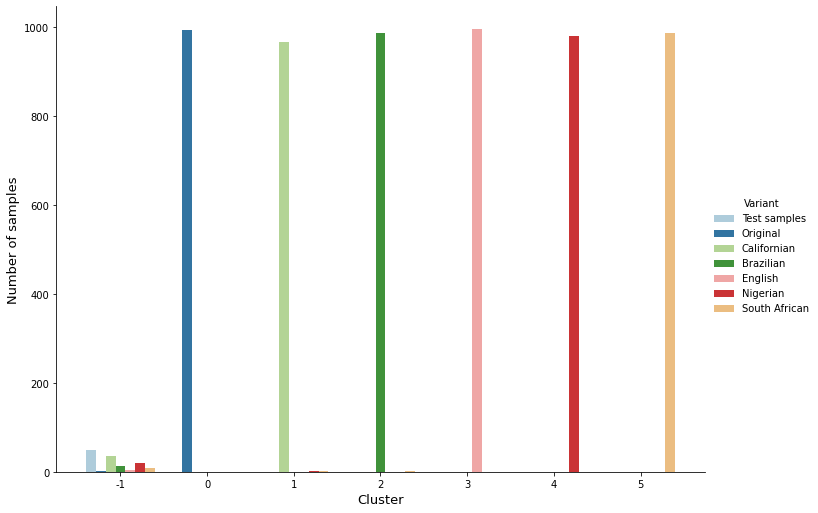

samples of indian variants:55


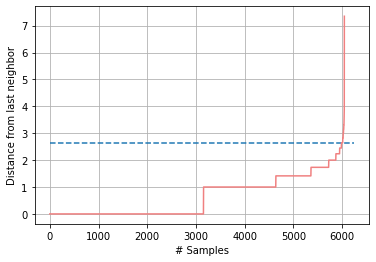

Labels [ 0  0  0 ... -1 -1  6]
n_clusters: 8
Estimated number of clusters: 8
Homogeneity: 0.980
Completeness: 0.958
V-measure: 0.969
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.969
Silhouette Coefficient: 0.437





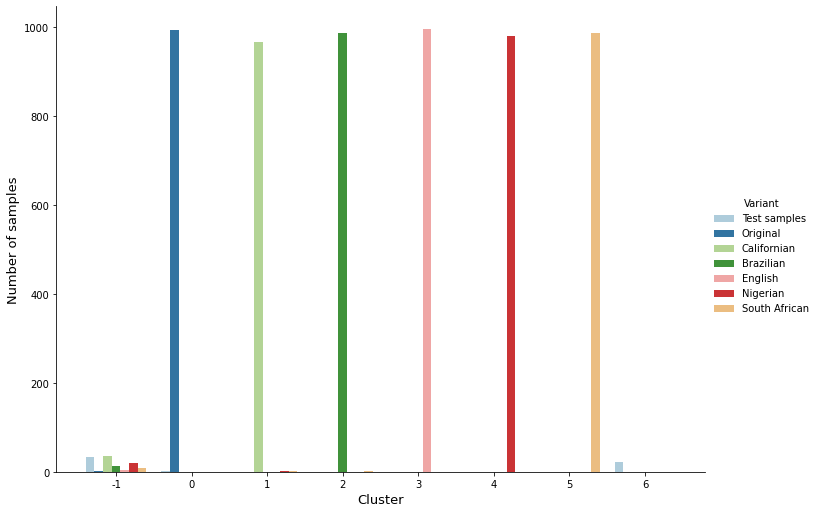

samples of indian variants:60


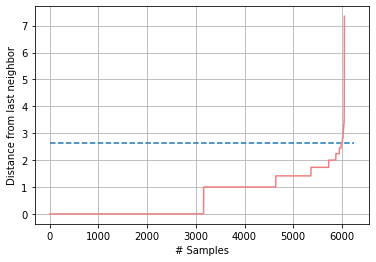

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 7
Estimated number of clusters: 7
Homogeneity: 0.977
Completeness: 0.961
V-measure: 0.969
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.969
Silhouette Coefficient: 0.460





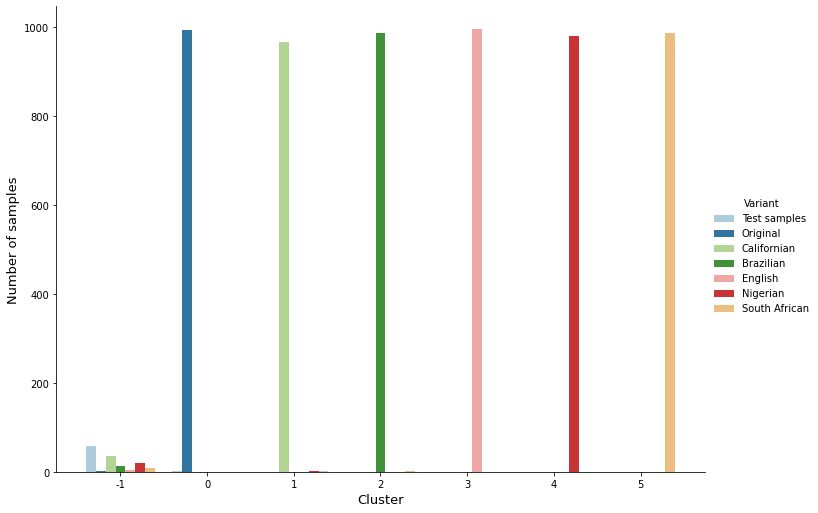

samples of indian variants:65


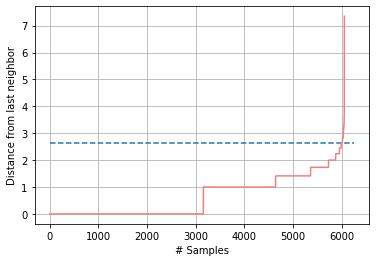

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 7
Estimated number of clusters: 7
Homogeneity: 0.978
Completeness: 0.961
V-measure: 0.970
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.969
Silhouette Coefficient: 0.460





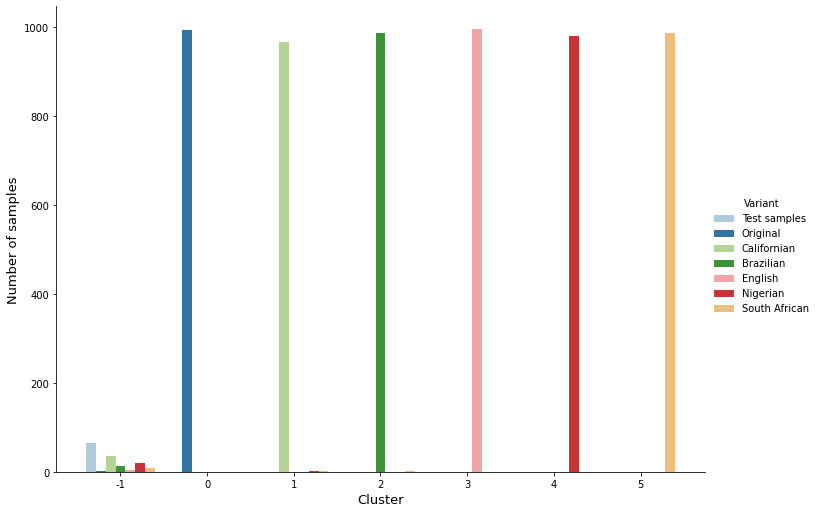

samples of indian variants:70


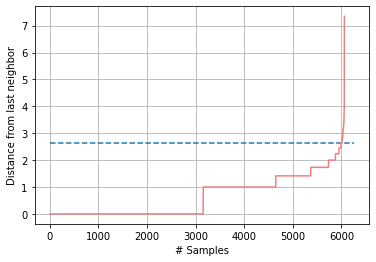

Labels [ 0  0  0 ...  6  6 -1]
n_clusters: 8
Estimated number of clusters: 8
Homogeneity: 0.980
Completeness: 0.958
V-measure: 0.969
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.969
Silhouette Coefficient: 0.437





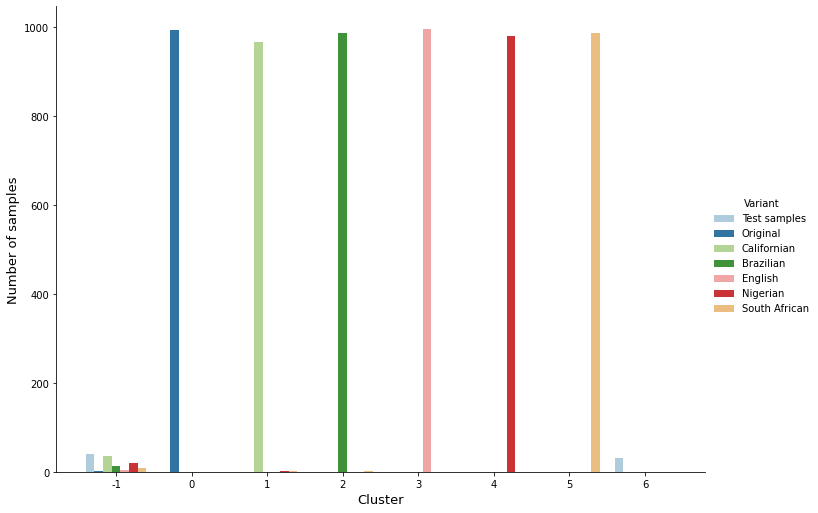

samples of indian variants:80


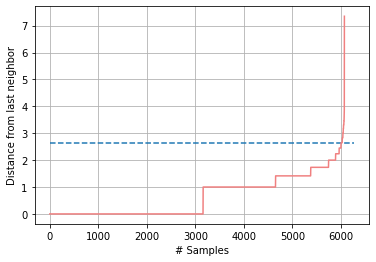

Labels [ 0  0  0 ... -1 -1 -1]
n_clusters: 8
Estimated number of clusters: 8
Homogeneity: 0.978
Completeness: 0.957
V-measure: 0.967
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.967
Silhouette Coefficient: 0.434





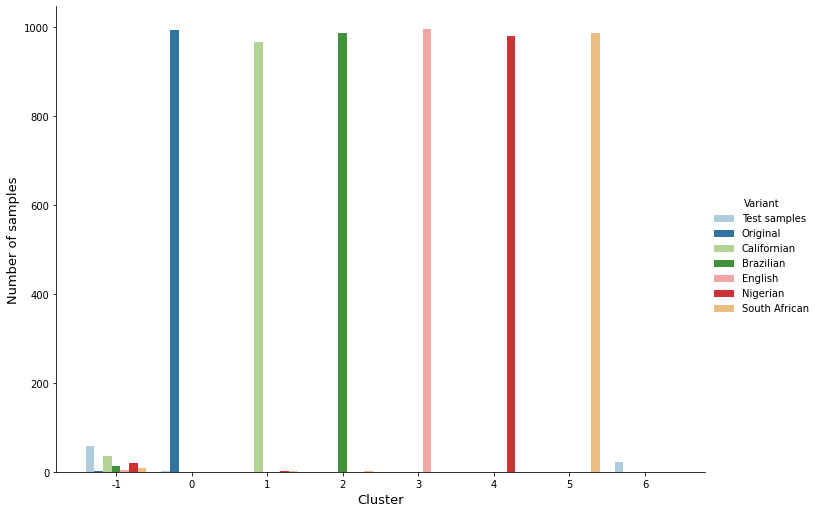

samples of indian variants:100


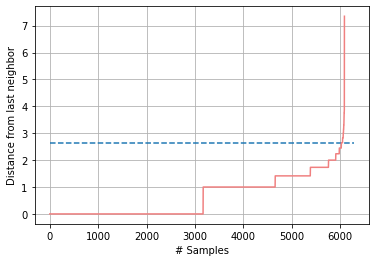

Labels [ 0  0  0 ... -1  6  6]
n_clusters: 8
Estimated number of clusters: 8
Homogeneity: 0.979
Completeness: 0.956
V-measure: 0.968
Adjusted Rand Index: 0.981
Adjusted Mutual Information: 0.968
Silhouette Coefficient: 0.439





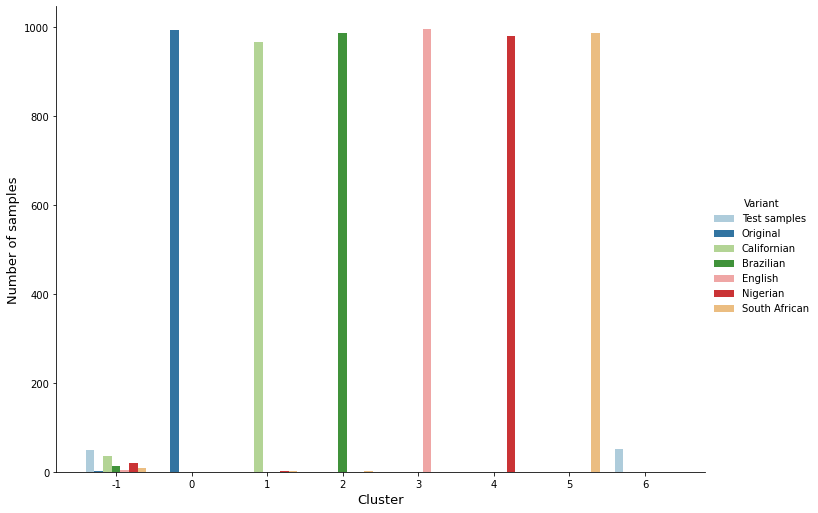

samples of indian variants:400


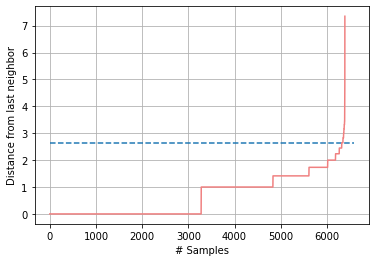

Labels [0 0 0 ... 6 6 6]
n_clusters: 8
Estimated number of clusters: 8
Homogeneity: 0.981
Completeness: 0.955
V-measure: 0.968
Adjusted Rand Index: 0.979
Adjusted Mutual Information: 0.968
Silhouette Coefficient: 0.429





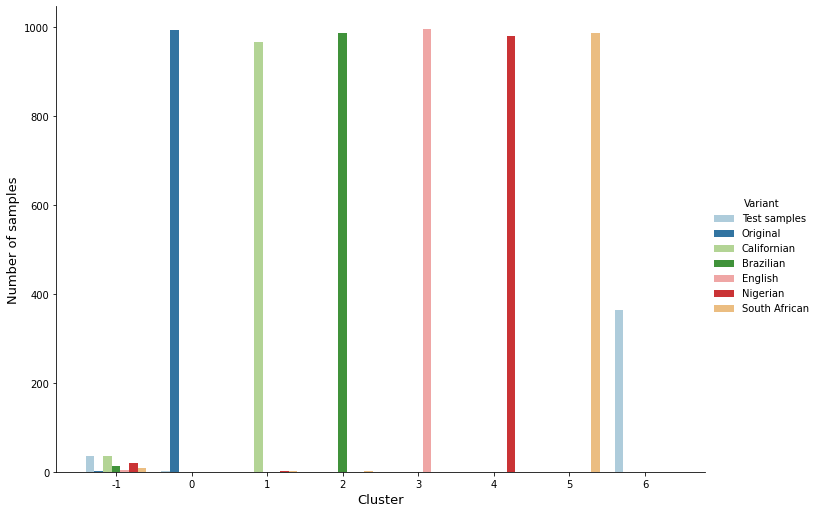

samples of indian variants:450


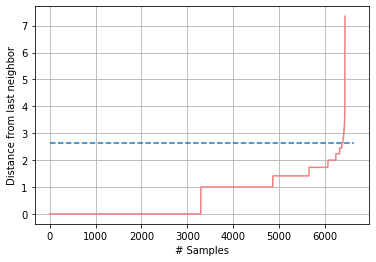

Labels [0 0 0 ... 6 6 6]
n_clusters: 8
Estimated number of clusters: 8
Homogeneity: 0.982
Completeness: 0.956
V-measure: 0.968
Adjusted Rand Index: 0.979
Adjusted Mutual Information: 0.968
Silhouette Coefficient: 0.427





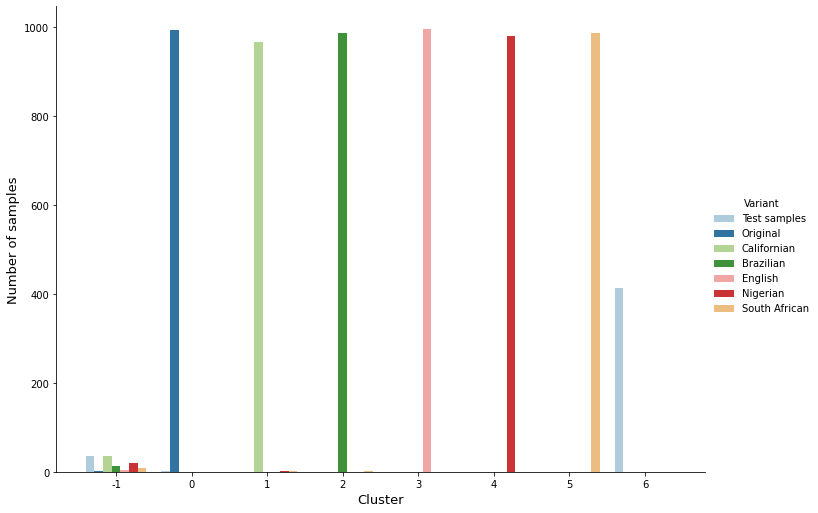

In [40]:
samples=[20,40,45,50,55,60,65,70,80,100,400,450]

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from matplotlib import pyplot as plt
RI=[]
SIL=[]
for num_sample in samples:
  print('samples of indian variants:'+str(num_sample))
  indi=indian.sample(n=num_sample)
  indi.to_csv('indiana_crush.csv')
  data=pd.concat([stat,indi])
  label=data['label']
  data.drop(columns='label',inplace=True)
  min_points=20
  #choose best epsilon
  #compute the distances to the k-neighbor 
  neighbors = NearestNeighbors(n_neighbors=min_points,metric='euclidean')
  neighbors_fit = neighbors.fit(data)

  distances, indices = neighbors_fit.kneighbors(data)
  
  distances = np.sort(distances[:,1])

  dist=pd.Series(distances)

  #calculate consecutive distances in a sorted array of distances 
  der=dist.diff()
  #set lim of consecutive zeros
  th=30
  counter = 0
  for i,k in enumerate(der[:len(data)-1]):#count the number of consecutive zeros
      if k > -1:
          if k == 0:

              counter = counter + 1
          else:
              #print(k)
              if counter < th:#when the counter is less the min value break ,best eps found!
                  best_eps=distances[i-1]
                  break
              else:
                  #print(counter)
                  counter = 0

  pd.DataFrame(distances)
  plt.grid()
  plt.xlabel('# Samples')
  plt.ylabel('Distance from last neighbor')
  plt.plot(distances,c='lightcoral')
  plt.hlines(best_eps,xmin=0,xmax=len(data)+200,linestyles='--',colors=my_cmap.colors[1])
  plt.show()
  #perform DBSCAN
  af = DBSCAN(eps=best_eps,min_samples=min_points,metric='euclidean').fit(data)
  #cluster_centers_indices = af.labels_
  labels = af.labels_
  print('Labels',labels)

  n_clusters_ = len(np.unique(labels))
  print('n_clusters:',n_clusters_)

  print('Estimated number of clusters: %d' % n_clusters_)
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(label, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(label, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(label, labels))
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(label, labels))
  RI.append(metrics.adjusted_rand_score(label, labels))
  print("Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(label, labels))
  print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(data, labels, metric='euclidean'))
  SIL.append(metrics.silhouette_score(data, labels, metric='euclidean'))
  prediction_pair=pd.DataFrame({'true_label':label,'pred':labels})


  # Create crosstab: ct
  ct = pd.crosstab(prediction_pair['true_label'], prediction_pair['pred'])

  # Display ct
  confusion_matrix=np.array(ct)

  m=[]

  map = {0 : "Original", 1 : "Californian", 2 : "Brazilian", 3 : "English", 4 : "Nigerian", 5 : "South African",-1:"Test samples"}
  for variant in range(-1,6):
    for cluster in range(-1,n_clusters_-1):
      m.append([confusion_matrix[variant+1,cluster+1],map[variant],cluster])
  df=pd.DataFrame(m,columns=["Value", "Variant", "Cluster"])
  print('\n\n')
  import matplotlib.pyplot as plt
  #cmap_bold = ['lightcoral', 'turquoise', 'mediumseagreen','orchid','lawngreen','orangered']

  #f, ax = plt.subplots(figsize=(25,20))
  ax = sns.catplot(x="Cluster", y="Value", hue="Variant", kind="bar", data=df,height=7, aspect=1.4,palette="Paired")
  plt.ylabel('Number of samples', fontsize=13)
  plt.xlabel('Cluster', fontsize=13)
  #ax.figure(figsize=(40,20))
  plt.plot()
  plt.show()

